## Import the libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Exploratory Data Analysis

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(6796, 10)

In [4]:
df.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,CoVeh_trqAcs_100ms,Clth_st_100ms,CoEng_st_100ms,Com_rTSC1VRVCURtdrTq_100ms,Com_rTSC1VRRDTrqReq_100ms,RoadSlope_100ms
0,1155.0,71.44,2187.5,-168.0,9.999747,0,3,0,0,1.7
1,1159.5,41.55,2632.0,-112.0,9.999747,0,3,0,0,4.2
2,1156.0,71.42,2215.5,-168.0,9.999747,0,3,0,0,1.7
3,1063.0,77.98,0.0,-140.0,9.999747,0,3,0,0,-4.4
4,1162.5,71.77,1207.5,-168.0,9.999747,0,3,0,0,0.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6796 entries, 0 to 6795
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Epm_nEng_100ms              6796 non-null   float64
 1   VehV_v_100ms                6796 non-null   float64
 2   ActMod_trqInr_100ms         6796 non-null   float64
 3   RngMod_trqCrSmin_100ms      6796 non-null   float64
 4   CoVeh_trqAcs_100ms          6796 non-null   float64
 5   Clth_st_100ms               6796 non-null   int64  
 6   CoEng_st_100ms              6796 non-null   int64  
 7   Com_rTSC1VRVCURtdrTq_100ms  6796 non-null   int64  
 8   Com_rTSC1VRRDTrqReq_100ms   6796 non-null   int64  
 9   RoadSlope_100ms             6796 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 531.1 KB


In [6]:
df.isnull().sum()

Epm_nEng_100ms                0
VehV_v_100ms                  0
ActMod_trqInr_100ms           0
RngMod_trqCrSmin_100ms        0
CoVeh_trqAcs_100ms            0
Clth_st_100ms                 0
CoEng_st_100ms                0
Com_rTSC1VRVCURtdrTq_100ms    0
Com_rTSC1VRRDTrqReq_100ms     0
RoadSlope_100ms               0
dtype: int64

### UniStats

In [7]:
def unistats(df):
    import pandas as pd
    output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Otype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    for col in df:
      if pd.api.types.is_numeric_dtype(df[col]):
        output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                              df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75),
                              df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]
      else:
        output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]), df[col],
                            df[col].mode().value[0], '-', '-', '-', '-', '-', '-', '-', '-', '-']
    return output_df

In [8]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
unistats(df)

,Count,Missing,Unique,Otype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Epm_nEng_100ms,6796,0,1199,float64,True,1158.000000,1102.662081,481.500000,944.000000,1144.750000,1191.000000,2119.500000,1.564377e+02,0.381476,2.034785
VehV_v_100ms,6796,0,2880,float64,True,71.480000,64.438992,38.310000,57.337500,67.395000,71.580000,88.930000,1.064214e+01,-0.658194,-0.272076
ActMod_trqInr_100ms,6796,0,1864,float64,True,0.000000,1408.981414,0.000000,339.500000,1602.184000,2327.500000,2688.000000,9.886134e+02,-0.254402,-1.442502
RngMod_trqCrSmin_100ms,6796,0,195,float64,True,-168.000000,-158.968887,-308.000000,-168.000000,-168.000000,-140.000000,-84.000000,2.629861e+01,-0.249672,1.013968
CoVeh_trqAcs_100ms,6796,0,1,float64,True,9.999747,9.999747,9.999747,9.999747,9.999747,9.999747,9.999747,1.776488e-15,0.000000,0.000000
Clth_st_100ms,6796,0,1,int64,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
CoEng_st_100ms,6796,0,1,int64,True,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000e+00,0.000000,0.000000
Com_rTSC1VRVCURtdrTq_100ms,6796,0,1,int64,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
Com_rTSC1VRRDTrqReq_100ms,6796,0,1,int64,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
RoadSlope_100ms,6796,0,143,float64,True,1.700000,0.866865,-4.800000,-0.400000,1.000000,2.100000,5.000000,2.193667e+00,-0.239157,-0.297804


Remove CoVeh-trqAcs-100ms, Clth-st-100ms,
CoEng-st-100ms, Com-rTSC1VRVCURtdrTq-100ms, Com-
rTSC1VRRDTrqReq-100ms

In [9]:
columns_to_remove = ['CoVeh_trqAcs_100ms', 'Clth_st_100ms', 'CoEng_st_100ms', 'Com_rTSC1VRVCURtdrTq_100ms', 'Com_rTSC1VRRDTrqReq_100ms']
df = df.drop(columns=columns_to_remove, axis=0)

### Bivstats

In [10]:
def bivstats(df, label):
    import pandas as pd
    import numpy as np
    from scipy import stats
    output_df = pd.DataFrame(columns=['r', 'p', 'F', 'X2'])
    for col in df:
        if col != label:
            if pd.api.types.is_numeric_dtype(df[col]):
                if df[col].isnull().sum() == 0:
                    r, p = stats.pearsonr(df[label], df[col])
                    output_df.loc[col] = [round(r, 3), round(p, 3), np.nan, np.nan]

                else:
                    output_df.loc[col] = [np.nan, np.nan, np.nan, 'nulls']
    output_df = output_df.sort_values(by=['r'], ascending=False)
    return output_df

In [11]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
bivstats(df, 'RoadSlope_100ms')

,r,p,F,X2
ActMod_trqInr_100ms,0.744,0.0,NaN,NaN
RngMod_trqCrSmin_100ms,0.464,0.0,NaN,NaN
Epm_nEng_100ms,0.136,0.0,NaN,NaN
VehV_v_100ms,-0.706,0.0,NaN,NaN


### Scatter Plot

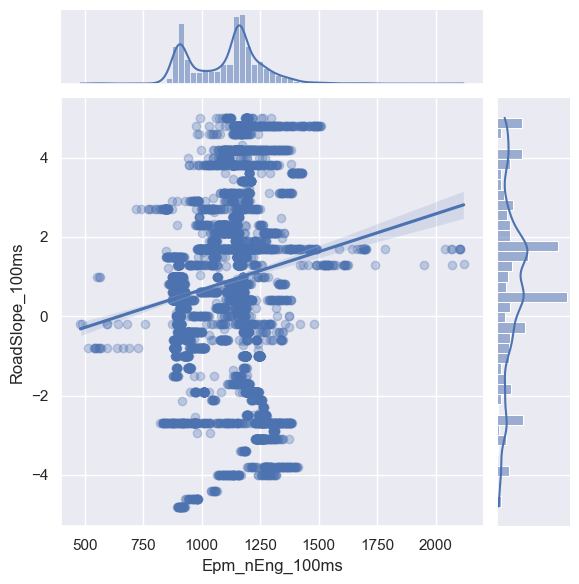

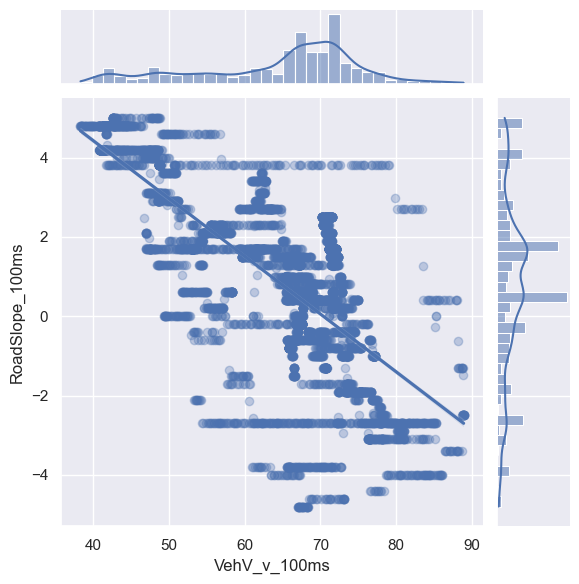

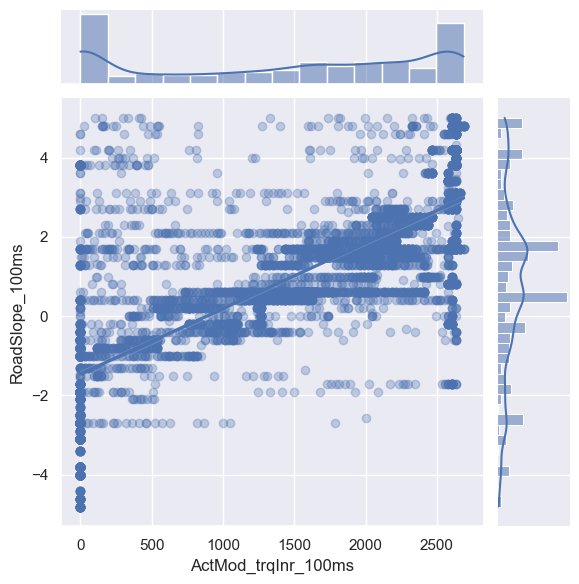

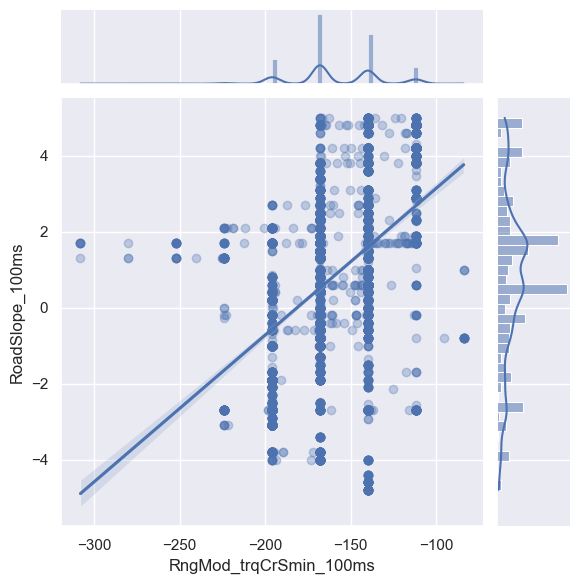

In [12]:
def scatter(df, label_column):
    sns.set(color_codes=True)
    for column in df.columns:
        if column != label_column:
            sns.jointplot(x=column, y=label_column, data=df, kind='reg', scatter_kws={'alpha':0.3})
            # plt.title(f'Scatter plot of {column} with {label_column}')
            plt.show()

scatter(df, 'RoadSlope_100ms')

### Correlation Matrix

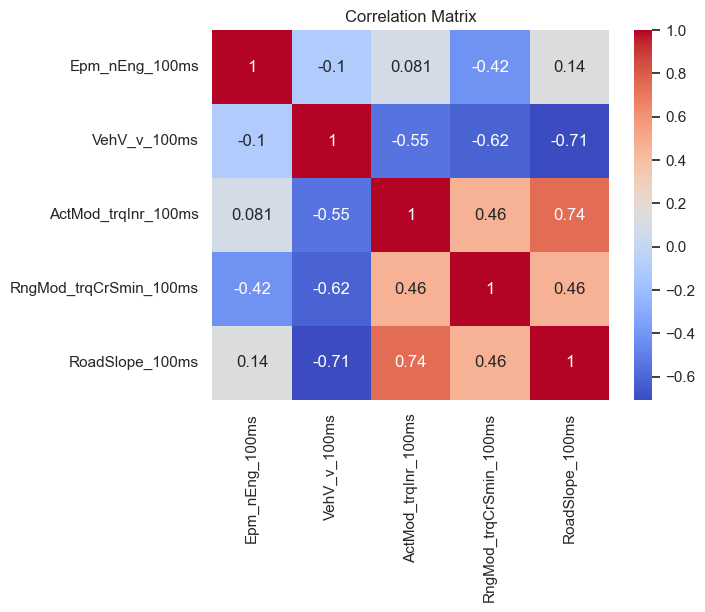

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=False)
plt.title('Correlation Matrix')
plt.show()

## Feature Transformation and Model

In [14]:
df.head()

,Epm_nEng_100ms,VehV_v_100ms,ActMod_trqInr_100ms,RngMod_trqCrSmin_100ms,RoadSlope_100ms
0,1155.0,71.44,2187.5,-168.0,1.7
1,1159.5,41.55,2632.0,-112.0,4.2
2,1156.0,71.42,2215.5,-168.0,1.7
3,1063.0,77.98,0.0,-140.0,-4.4
4,1162.5,71.77,1207.5,-168.0,0.6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6796 entries, 0 to 6795
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Epm_nEng_100ms          6796 non-null   float64
 1   VehV_v_100ms            6796 non-null   float64
 2   ActMod_trqInr_100ms     6796 non-null   float64
 3   RngMod_trqCrSmin_100ms  6796 non-null   float64
 4   RoadSlope_100ms         6796 non-null   float64
dtypes: float64(5)
memory usage: 265.6 KB


### RoadSlope_100ms

In [16]:
from sklearn.preprocessing import RobustScaler
X_train = df.drop(columns=['RoadSlope_100ms' ])
Y_train_slope = df['RoadSlope_100ms']



In [17]:
transformer = RobustScaler().fit(X_train)
X_train = transformer.transform(X_train)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train_slope)


LinearRegression()

In [19]:
import joblib
joblib.dump(model, 'linear_regression_model.joblib')
joblib.dump(transformer, 'scaler.joblib')

['scaler.joblib']